### Average height of coffee drinkers vs non-coffee drinkers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('data/coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` We are interested to see if the average height for coffee drinkers is the same as for non-coffee drinkers. Our null and alternative hypothesis would be:

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_0: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2.` If we were interested to see if the average height for coffee drinkers is less than non-coffee drinkers, then the null and alternative hypothesis would be:

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_0: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`3.`  
### Bootstrapping

Bootstrap the sample data with a sample size of 200 for 10000 iterations, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  Three arrays at the end of the iterations - one for each mean and one for the difference in means. 

In [4]:
nocoff_means, coff_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   

In [5]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.40512631277475264

In [6]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24073763373473001

In [7]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.46980910743871468

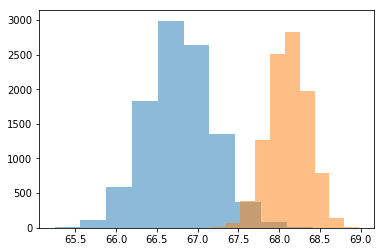

In [8]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); # They look pretty normal to me!

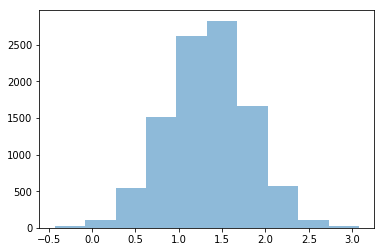

In [9]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

In [13]:
# Mean of the difference observed:
obs_mean_diff = np.mean(diffs)
print(obs_mean_diff)

1.33627134748


`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [15]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

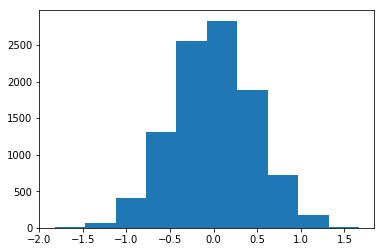

In [16]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null

### Where does the observed value fall on this null distribution ?

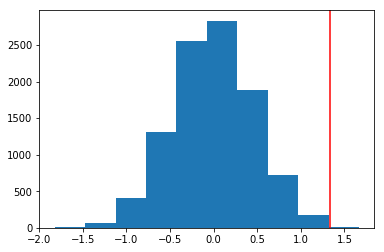

In [17]:
plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(obs_mean_diff,color='red')

### What proportion of the probabilities (null_vals) are greater than the actual difference observed?

In [20]:
null_valsa = np.array(null_vals)
pval = (abs(null_valsa)>abs(obs_mean_diff)).mean()
print(pval)

0.004


Since the p-value is very small we conclude that the heights of coffee and non-coffee drinkers are not the same and the coffee drinkers are taller than the non-coffee drinkers.